# Identify stars in images

The star catalog **hip_main.dat** consists of columns separated by | and with no header. Column 2 is the star identifier, column 6 is the magnitude, column 9 and 10 are RA and DE in degrees.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import simulator as sim

In [5]:
star_catalog = sim.StarCatalog('../data/hip_main.dat')

In [6]:
len(star_catalog.star_vectors)

117955

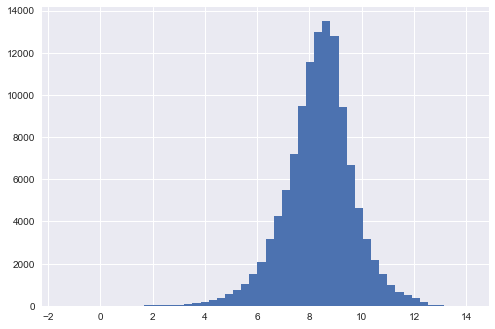

In [7]:
pd.Series(star_catalog.magnitudes).hist(bins=50)

The function *calc_md5* is used to calculate a MD5 checksum from the star catalog to detect changes of the file. In this case the features have to be recalculated.

In [14]:
from hashlib import md5

def calc_md5(file_name):
    fd = open(file_name)
    buffer = fd.read()
    hash = md5(buffer)
    fd.close()
    return hash.hexdigest()

In [15]:
signature = calc_md5('../data/hip_main.dat')

In [9]:
def distance(v):
    return np.sqrt(np.dot(v,v))

def normalized_angle(v1,v2):
    return np.acos(np.dot(v1,v2)/(distance(v1)*distance(v2)))/np.pi

def distances(v1,v2,v3):
    x3 = distance(v3)
    return (distance(v1) - x3)/(distance(v2) - x3)


In [10]:
# find the two closest stars to each star in the catalog
ids = star_catalog.catalog['HIP'].values
star_catalog.catalog.index = ids
cat = zip(ids, star_catalog.star_vectors,star_catalog.magnitudes)
nearest_stars = []

for hip, pos, mag in cat:

    # get the nearest star
    selection1 = ids != hip
    dist = star_catalog.star_vectors[selection1] - pos
    dist2 = np.sum(dist * dist, axis=1)
    index1 = np.argmin(dist2)
    ids2 = ids[selection1]
    hip1 = ids2[index1]
    pos1 = star_catalog.star_vectors[selection1][index1]
    mag1 = star_catalog.magnitudes[selection1][index1]

    # get the second nearest star
    selection2 = hip1 != ids2
    index2 = np.argmin(dist2[selection2])
    hip2 = ids2[selection2][index2]
    pos2 = star_catalog.star_vectors[selection1][selection2][index2]
    mag2 = star_catalog.magnitudes[selection1][selection2][index2]

    # calculate star measures
    y1 = (mag1 - mag2) / mag
    y2 = normalized_angle(pos1 - pos, pos2 - pos)
    y3 = distances(pos1 - pos, pos2 - pos, pos1 - pos2)
    # print str(hip) + " -> " + str(hip1) + "," + str(hip2) + "," + str(y1) + "," + str(y2) + "," + str(y3)
    nearest_stars.append([hip1, hip2, y1, y2, y3])
    
features = pd.DataFrame(index = ids, 
                        columns = ['hip1',
                                   'hip2',
                                   'nearest_stars_magnitude',
                                   'nearest_stars_angle',
                                   'nearest_stars_distance'], 
                        data = nearest_stars)
features.to_csv('../data/hip_feat_' + str(signature) + '.csv')

KeyboardInterrupt: 

In [32]:
star_catalog.catalog

Catalog     HIP Proxy        RAhms        DEdms   Vmag  VarFlag r_Vmag  \
1            H       1   NaN  00 00 00.22  +01 05 20.4   9.10      NaN      H   
2            H       2   NaN  00 00 00.91  -19 29 55.8   9.27      NaN      G   
3            H       3   NaN  00 00 01.20  +38 51 33.4   6.61      NaN      G   
4            H       4   NaN  00 00 02.01  -51 53 36.8   8.06      NaN      H   
5            H       5   NaN  00 00 02.39  -40 35 28.4   8.55      NaN      H   
6            H       6   NaN  00 00 04.35  +03 56 47.4  12.31      NaN      G   
7            H       7   NaN  00 00 05.41  +20 02 11.8   9.64      NaN      G   
8            H       8   NaN  00 00 06.55  +25 53 11.3   9.05      3.0      H   
9            H       9   NaN  00 00 08.48  +36 35 09.4   8.59      NaN      H   
10           H      10   NaN  00 00 08.70  -50 52 01.5   8.59      NaN      H   
11           H      11   NaN  00 00 08.95  +46 56 24.0   7.34      NaN      H   
12           H      12   NaN  00 00 09.82  -35 57 36.8   8.43      NaN      H   
13           H      13   NaN  00 00 10.00  -22 35 40.9   8.80      NaN      H   
14           H      14   NaN  00 00 11.59  -00 21 37.5   7.25      NaN      G   
15           H      15   NaN  00 00 12.07  +50 47 28.2   8.60      NaN      H   
17           H      17   NaN  00 00 12.26  -40 11 32.4   8.15      NaN      H   
16           H      16   NaN  00 00 12.34  -54 54 50.9  11.71      NaN      G   
18           H      18   NaN  00 00 12.75  -04 03 13.5  11.03      NaN      G   
19           H      19   NaN  00 00 12.80  +38 18 14.7   6.53      NaN      H   
20           H      20   NaN  00 00 15.11  +23 31 45.4   8.51      NaN      G   
21           H      21   NaN  00 00 15.90  +08 00 26.0   7.55      NaN      H   
22           H      22   NaN  00 00 16.83  -49 21 08.2   8.69      NaN      H   
23           H      23   NaN  00 00 17.86  +13 18 44.0   7.57      NaN      G   
24           H      24   NaN  00 00 18.25  -23 27 09.9   9.05      NaN      H   
25           H      25     H  00 00 19.05  -44 17 25.1   6.28      NaN      G   
26           H      26   NaN  00 00 20.24  -13 23 35.9   9.13      NaN      H   
27           H      27   NaN  00 00 20.51  -41 17 51.1   9.32      NaN      H   
28           H      28   NaN  00 00 20.94  -43 21 42.5   8.83      NaN      H   
29           H      29   NaN  00 00 22.11  -49 06 28.6   9.14      NaN      H   
30           H      30   NaN  00 00 23.07  +42 08 29.4   8.26      NaN      H   
...        ...     ...   ...          ...          ...    ...      ...    ...   
118293       H  118293   NaN  23 59 34.95  -01 51 00.0   7.49      NaN      G   
118294       H  118294     H  23 59 35.10  -07 48 37.8   8.69      2.0      H   
118295       H  118295   NaN  23 59 35.58  +29 03 27.0   8.43      NaN      H   
118296       H  118296   NaN  23 59 38.52  -49 49 56.8   9.23      NaN      H   
118297       H  118297   NaN  23 59 39.53  +37 47 58.7   7.88      NaN      H   
118298       H  118298   NaN  23 59 40.62  -05 53 34.5   6.55      NaN      H   
118300       H  118300   NaN  23 59 42.00  -51 37 15.1   9.52      NaN      H   
118299       H  118299   NaN  23 59 42.09  -34 59 53.0   9.07      NaN      H   
118301       H  118301   NaN  23 59 43.22  +21 17 21.1   7.67      NaN      H   
118302       H  118302   NaN  23 59 43.78  -24 38 42.7   7.78      NaN      G   
118303       H  118303   NaN  23 59 44.22  +62 59 30.1   7.94      2.0      H   
118304       H  118304   NaN  23 59 44.66  -32 12 38.3   8.27      NaN      H   
118305       H  118305   NaN  23 59 44.74  +08 41 21.0  11.94      NaN      G   
118306       H  118306   NaN  23 59 46.08  -50 59 56.9   7.28      NaN      H   
118307       H  118307   NaN  23 59 46.49  -00 16 48.2   6.83      2.0      H   
118308       H  118308   NaN  23 59 47.73  +50 06 45.0   9.93      NaN      H   
118309       H  118309   NaN  23 59 47.81  +11 16 24.3   6.74      NaN      H   
118310       H  118310   NaN  23 59 47

In [17]:
?star_catalog.catalog.to_csv()

In [18]:
str(signature)

'5775d9f9d2f257420f6647a72556a0d2'